In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv"
df_test = pd.read_csv(url)
url_2 = "https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv"
df_train = pd.read_csv(url_2)

In [3]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. Year : 1985 - 2009
2. Item weight : 4.555 - 21.35
3. Item visibility : 0 - 1

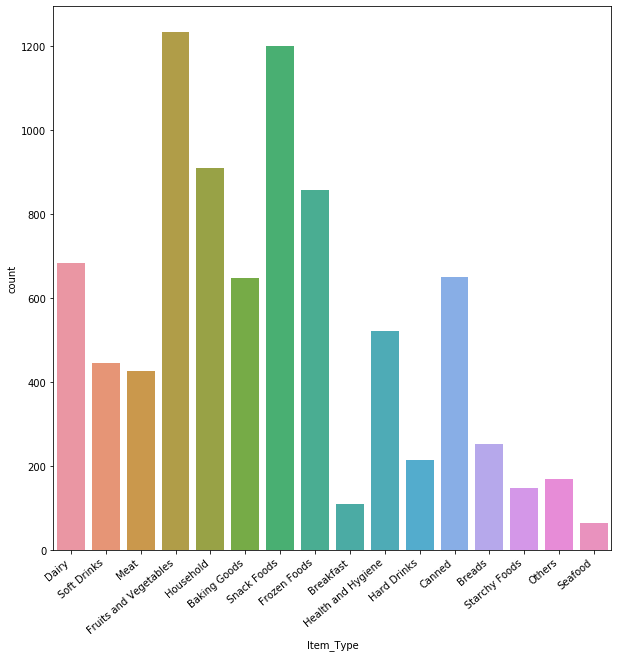

In [6]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df_train["Item_Type"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [7]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
df_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

#### "LF", "low fat" are the same as "Low Fat"

In [9]:
df_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

#### There are 10 Outlets in total

In [10]:
b = pd.DataFrame(df_train["Item_Identifier"].value_counts())
b.reset_index(level=0,inplace=True)
b['Item_Identifier'].value_counts()
# b

5     395
6     383
7     253
4     234
3     113
8     110
2      35
9      25
1       9
10      2
Name: Item_Identifier, dtype: int64

#### Only 2 items are present in all 10 outlets

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Null values in Item_Weight can be filled by assigning the mean weight of the item in other stores

In [13]:
df_train["Item_Weight"] = df_train.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))
df_test["Item_Weight"] = df_test.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))

In [14]:
df_train[df_train["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


#### Some items are present only in one store - Fill them with mean weight of the Item_Type

In [15]:
df_train["Item_Weight"] = df_train.groupby("Item_Type")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))
df_test["Item_Weight"] = df_test.groupby("Item_Type")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))

#### Fill Outlet_Size with mode of the Outlet_Size having same Outlet_Type

In [16]:
from scipy.stats import mode

dict_grp_outlet_type = df_train.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x:mode(x).mode[0]).to_dict()
dict_grp_outlet_type

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [17]:
df_train['Outlet_Size'] = df_train.apply(lambda row: dict_grp_outlet_type[row['Outlet_Type']] if (row['Outlet_Size']not in ["Medium","Small","High"]) else row['Outlet_Size'],axis=1)
df_test['Outlet_Size'] = df_test.apply(lambda row: dict_grp_outlet_type[row['Outlet_Type']] if (row['Outlet_Size']not in ["Medium","Small","High"]) else row['Outlet_Size'],axis=1)

After filling all the null values, verify null values again

In [18]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#### Item_Visibility with value 0 should be set to mean based on Item_Identifier

In [20]:
len(df_train[df_train['Item_Visibility']==0.0])

526

In [21]:
len(df_test[df_test['Item_Visibility']==0.0])

353

In [22]:
dict_grp_item_id = df_train.groupby("Item_Identifier")["Item_Visibility"].mean().to_dict()
dict_grp_item_id

{'DRA12': 0.031956177,
 'DRA24': 0.04806226414285714,
 'DRA59': 0.134718017375,
 'DRB01': 0.08212644233333333,
 'DRB13': 0.008002348599999999,
 'DRB24': 0.020623782,
 'DRB25': 0.07730474816666667,
 'DRB48': 0.023700081428571433,
 'DRC01': 0.019219470166666665,
 'DRC12': 0.03789327825,
 'DRC13': 0.024408559,
 'DRC24': 0.024942033500000002,
 'DRC25': 0.04815856442857142,
 'DRC27': 0.06475441333333333,
 'DRC36': 0.035993519800000005,
 'DRC49': 0.06532683,
 'DRD01': 0.0613361044,
 'DRD12': 0.06628431071428571,
 'DRD13': 0.04913169057142857,
 'DRD15': 0.06837602242857144,
 'DRD24': 0.03378398957142857,
 'DRD25': 0.083190056625,
 'DRD27': 0.022682492,
 'DRD37': 0.015198772285714285,
 'DRD49': 0.168145552,
 'DRD60': 0.041920116666666674,
 'DRE01': 0.223469365,
 'DRE03': 0.026604318000000005,
 'DRE12': 0.058932965000000004,
 'DRE13': 0.0276924628,
 'DRE15': 0.014086419333333334,
 'DRE25': 0.0733151374,
 'DRE27': 0.147626014,
 'DRE37': 0.0896310842,
 'DRE48': 0.014851214428571428,
 'DRE49': 0.0

In [23]:
df_train['Item_Visibility'] = df_train.apply(lambda row: dict_grp_item_id[row['Item_Identifier']] if (row['Item_Visibility'] == 0.00) else row['Item_Visibility'],axis=1)
df_test['Item_Visibility'] = df_test.apply(lambda row: dict_grp_item_id[row['Item_Identifier']] if (row['Item_Visibility']== 0.00) else row['Item_Visibility'],axis=1)

In [24]:
len(df_train[df_train['Item_Visibility']==0.0])

0

In [25]:
len(df_test[df_test['Item_Visibility']==0.0])

0

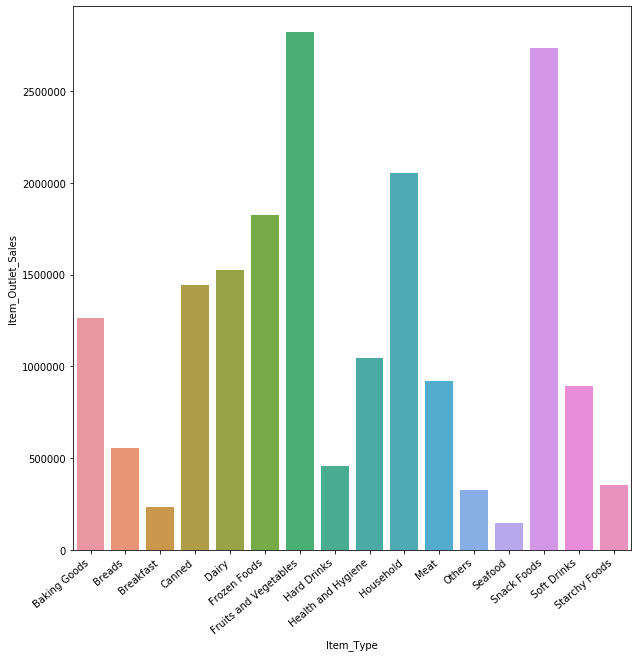

In [26]:
df_Item_type_grp = df_train[["Item_Type","Item_Outlet_Sales"]].groupby(["Item_Type"]).sum()
df_Item_type_grp.reset_index(inplace=True)
df_Item_type_grp["Item_Outlet_Sales"] = df_Item_type_grp["Item_Outlet_Sales"].astype(int)
df_Item_type_grp
plt.figure(figsize=(10,10))
ax = sns.barplot(x = df_Item_type_grp["Item_Type"],  y=df_Item_type_grp["Item_Outlet_Sales"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Changing Fat Content

In [27]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
fc = "Inedible"
df_train['Item_Fat_Content'] = df_train.apply(lambda row:fc if (row['Item_Type'] in ["Household","Others"]) else (row['Item_Fat_Content']),axis=1)
df_train['Item_Fat_Content'].value_counts()

Low Fat     4438
Regular     3006
Inedible    1079
Name: Item_Fat_Content, dtype: int64

In [28]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
fc = "Inedible"
df_test['Item_Fat_Content'] = df_test.apply(lambda row:fc if (row['Item_Type'] in ["Household","Others"]) else (row['Item_Fat_Content']),axis=1)
df_test['Item_Fat_Content'].value_counts()

Low Fat     2919
Regular     2013
Inedible     749
Name: Item_Fat_Content, dtype: int64

In [29]:
df_outlet_grp = df_train[["Outlet_Identifier","Item_Outlet_Sales"]].groupby("Outlet_Identifier").sum()
df_outlet_grp.reset_index(level=0,inplace=True)
df_outlet_grp["Item_Outlet_Sales"] = df_outlet_grp["Item_Outlet_Sales"].astype(int)
df_outlet_grp

,Outlet_Identifier,Item_Outlet_Sales
0,OUT010,188340
1,OUT013,2142663
2,OUT017,2167465
3,OUT018,1851822
4,OUT019,179694
5,OUT027,3453926
6,OUT035,2268122
7,OUT045,2036725
8,OUT046,2118395
9,OUT049,2183969


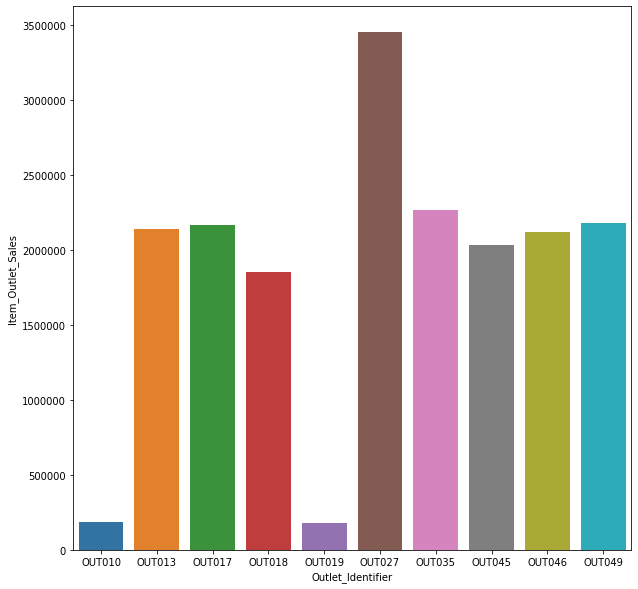

In [30]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=df_outlet_grp["Item_Outlet_Sales"] , x=df_outlet_grp["Outlet_Identifier"] )
# ax.set(ylim=(179600, 3453950))
plt.show()

In [31]:
df_train["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [32]:
df_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

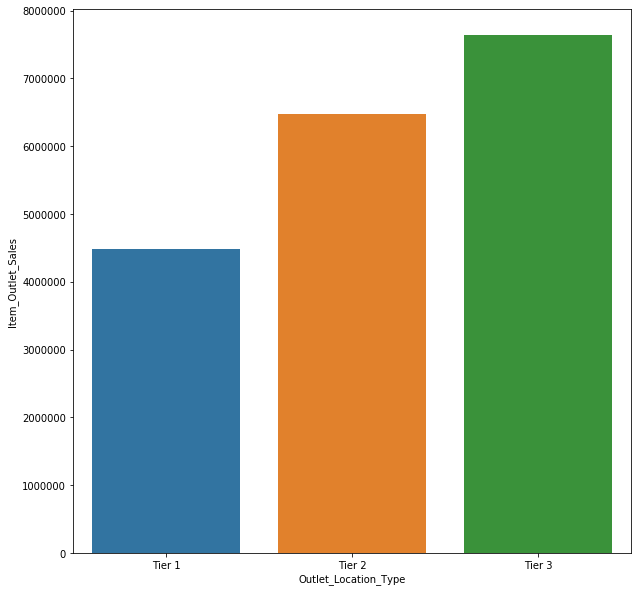

In [33]:
df_outlet_loc_type_grp = df_train[["Outlet_Location_Type","Item_Outlet_Sales"]].groupby(["Outlet_Location_Type"]).sum()
df_outlet_loc_type_grp.reset_index(inplace=True)
df_outlet_loc_type_grp["Item_Outlet_Sales"] = df_outlet_loc_type_grp["Item_Outlet_Sales"].astype(int)
df_outlet_loc_type_grp
plt.figure(figsize=(10,10))
sns.barplot(x = df_outlet_loc_type_grp["Outlet_Location_Type"],  y=df_outlet_loc_type_grp["Item_Outlet_Sales"])

In [34]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

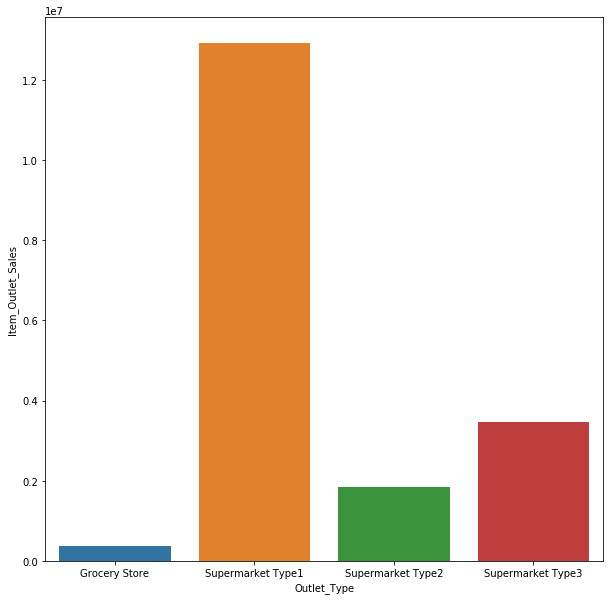

In [35]:
df_outlet_type_grp = df_train[["Outlet_Type","Item_Outlet_Sales"]].groupby(["Outlet_Type"]).sum()
df_outlet_type_grp.reset_index(inplace=True)
df_outlet_type_grp["Item_Outlet_Sales"] = df_outlet_type_grp["Item_Outlet_Sales"].astype(int)
df_outlet_type_grp
plt.figure(figsize=(10,10))
sns.barplot(x = df_outlet_type_grp["Outlet_Type"],  y=df_outlet_type_grp["Item_Outlet_Sales"])

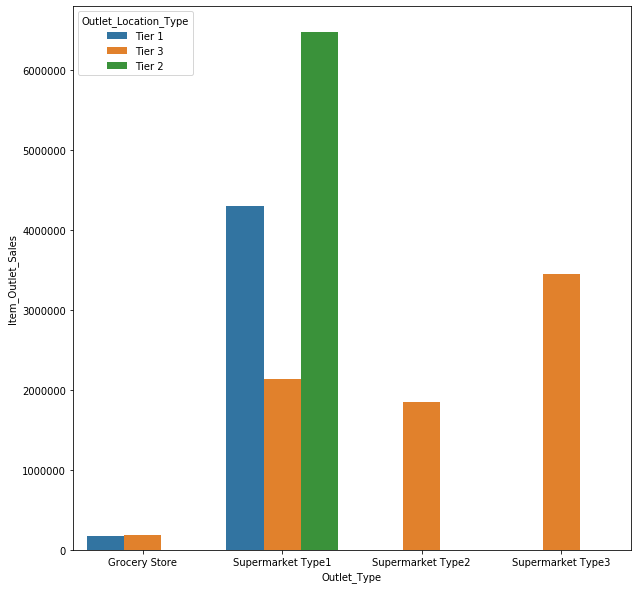

In [36]:
df_outlet_type_loc_grp = df_train[["Outlet_Type","Item_Outlet_Sales","Outlet_Location_Type"]].groupby(["Outlet_Type","Outlet_Location_Type"]).sum()
df_outlet_type_loc_grp.reset_index(inplace=True)
df_outlet_type_loc_grp["Item_Outlet_Sales"] = df_outlet_type_loc_grp["Item_Outlet_Sales"].astype(int)
df_outlet_type_loc_grp
plt.figure(figsize=(10,10))
sns.barplot(x = df_outlet_type_loc_grp["Outlet_Type"], hue = df_outlet_type_loc_grp["Outlet_Location_Type"], y=df_outlet_type_loc_grp["Item_Outlet_Sales"])

#### OUTLET DETAILS

In [37]:
df_1 = df_train[["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Type","Outlet_Location_Type","Item_Outlet_Sales"]]
df_outlet_grp_yr = pd.DataFrame(df_1.groupby(["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Type","Outlet_Location_Type","Outlet_Size"]).sum())
df_outlet_grp_yr.reset_index(inplace=True)
df_outlet_grp_yr["Item_Outlet_Sales"] = df_outlet_grp_yr["Item_Outlet_Sales"].astype("int")
df_outlet_grp_yr
# df_1

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Outlet_Location_Type,Outlet_Size,Item_Outlet_Sales
0,OUT010,1998,Grocery Store,Tier 3,Small,188340
1,OUT013,1987,Supermarket Type1,Tier 3,High,2142663
2,OUT017,2007,Supermarket Type1,Tier 2,Small,2167465
3,OUT018,2009,Supermarket Type2,Tier 3,Medium,1851822
4,OUT019,1985,Grocery Store,Tier 1,Small,179694
5,OUT027,1985,Supermarket Type3,Tier 3,Medium,3453926
6,OUT035,2004,Supermarket Type1,Tier 2,Small,2268122
7,OUT045,2002,Supermarket Type1,Tier 2,Small,2036725
8,OUT046,1997,Supermarket Type1,Tier 1,Small,2118395
9,OUT049,1999,Supermarket Type1,Tier 1,Medium,2183969


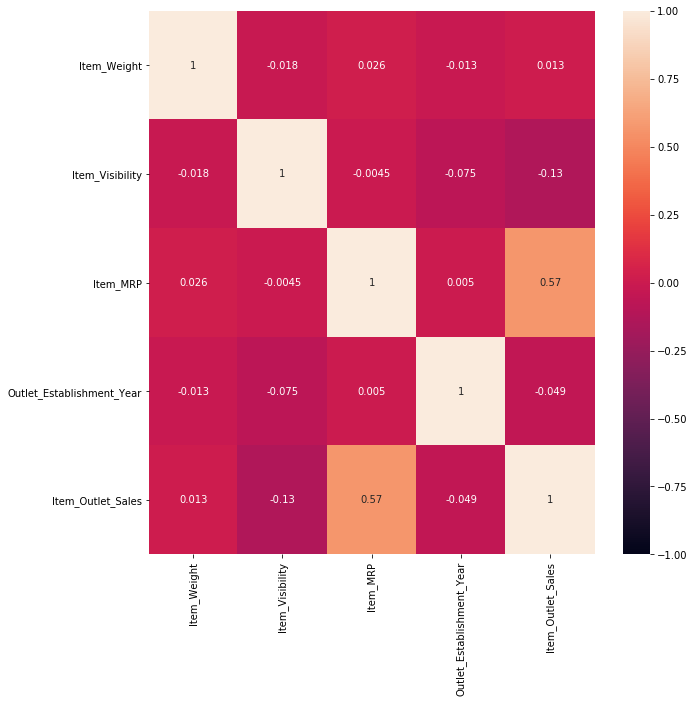

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True, vmin=-1, vmax=1)

In [39]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Inedible,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Data PreProcessing

In [40]:
print("Train Item_Type : ",len(df_train["Item_Type"].unique()))
print("Test Item_Type : ",len(df_test["Item_Type"].unique()))

Train Item_Type :  16
Test Item_Type :  16


In [41]:
print("Train Outlet_Size : ",len(df_train["Outlet_Size"].unique()))
print("Test Outlet_Size : ",len(df_test["Outlet_Size"].unique()))

Train Outlet_Size :  3
Test Outlet_Size :  3


In [42]:
print("Train Outlet_Location_Type: ",len(df_train["Outlet_Location_Type"].unique()))
print("Test Outlet_Location_Type : ",len(df_test["Outlet_Location_Type"].unique()))

Train Outlet_Location_Type:  3
Test Outlet_Location_Type :  3


In [43]:
print("Train Outlet_Type : ",len(df_train["Outlet_Type"].unique()))
print("Test Outlet_Type : ",len(df_test["Outlet_Type"].unique()))

Train Outlet_Type :  4
Test Outlet_Type :  4


In [44]:
print("Train Outlet_Identifier : ",len(df_train["Outlet_Identifier"].unique()))
print("Test Outlet_Identifier : ",len(df_test["Outlet_Identifier"].unique()))

Train Outlet_Identifier :  10
Test Outlet_Identifier :  10


In [45]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cols = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
for col in cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.fit_transform(df_test[col])
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.015274,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.930,0,0.008082,9,53.8614,1,1987,0,2,1,994.7052
5,FDP36,10.395,2,0.060928,0,51.4008,3,2009,1,2,2,556.6088
6,FDO10,13.650,2,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,FDP10,19.000,1,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,FDH17,16.200,2,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,FDU28,19.200,2,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


In [47]:
df_train.drop(["Item_Identifier","Outlet_Establishment_Year"],inplace=True,axis=1)
df_test.drop(["Item_Identifier","Outlet_Establishment_Year"],inplace=True,axis=1)

In [48]:
print(df_train.shape)
print(df_test.shape)

(8523, 10)
(5681, 9)


### MODEL BUILDING

In [49]:
x = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [50]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression" : {'model':LinearRegression(),
                           'params':{}
                          }, 
    "Ridge" : {'model':Ridge(),
               'params':{}
              }, 
    "Decision Tree" : {'model':DecisionTreeRegressor(),
                       'params':{'max_depth' : [5],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Random Forest" : {'model':RandomForestRegressor(),
                       'params':{'n_estimators':[100,150],
                                 'max_depth':[5,8], 
                                 'min_samples_leaf':[50,100,150],
                                 'n_jobs':[3]
                                }
                      },
}


In [51]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error
# scores = []
# for i,j in models.items():
# #     predictions = j['model'].predict(x)
#     grid = GridSearchCV(j['model'], j['params'], cv=30, scoring='neg_mean_squared_error')
#     grid.fit(x,y)
#     scores.append({
#         'model': i,
#         'best_score' : np.sqrt(np.abs(grid.best_score_)),
#         'best_params' : grid.best_params_
#     })
#     print(i)
#     print ("RMSE : ", np.sqrt(mean_squared_error(y.values, predictions)))
#     print ("CV Score : Mean-",np.mean(cv_score), " Std-",np.std(cv_score), " Min-", np.min(cv_score), " Max-",np.max(cv_score))
#     print("----------------------------------------------------------------------------------------------------------------------")
#     print(j.fit(x,y))

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

for i,j in models.items():
    j['model'].fit(x,y)
    predictions = j['model'].predict(x)
    score = cross_val_score(j['model'], x,y, cv=30, scoring='neg_mean_squared_error')
    score = np.sqrt(np.abs(score))
    print(i)
    print ("RMSE : ", np.sqrt(mean_squared_error(y.values, predictions)))
    print ("CV Score : Mean-",np.mean(score), " Std-",np.std(score))
    print("----------------------------------------------------------------------------------------------------------------------")
    

Linear Regression
RMSE :  1202.2330214011874
CV Score : Mean- 1202.43039724591  Std- 55.57724172954861
----------------------------------------------------------------------------------------------------------------------
Ridge
RMSE :  1202.2386611193597
CV Score : Mean- 1202.432200682523  Std- 55.543374119726884
----------------------------------------------------------------------------------------------------------------------
Decision Tree
RMSE :  0.0
CV Score : Mean- 1543.3778850732663  Std- 91.20772752044265
----------------------------------------------------------------------------------------------------------------------
Random Forest
RMSE :  424.71135608281895
CV Score : Mean- 1138.2394066256022  Std- 55.579980722331925
----------------------------------------------------------------------------------------------------------------------


In [53]:
scores=[]
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(models['Decision Tree']['model'], models['Decision Tree']['params'], cv=30, scoring = 'neg_mean_squared_error')
grid.fit(x,y)
# scores.append
print({
    'model': 'Decison tree',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
#     grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'Decison tree', 'best_score': 1089.4555516444093, 'best_params': {'max_depth': 5, 'min_samples_leaf': 50}}


In [54]:
grid = GridSearchCV(models['Random Forest']['model'], models['Random Forest']['params'], cv=30, scoring = 'neg_mean_squared_error')
grid.fit(x,y)
# scores.append
print({
    'model': 'Random Forest',
    'best_score' : np.sqrt(np.abs(grid.best_score_)),
#     grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'Random Forest', 'best_score': 1079.9379008811813, 'best_params': {'max_depth': 8, 'min_samples_leaf': 50, 'n_estimators': 150, 'n_jobs': 3}}


### RANDOM FOREST REGRESSOR IS THE MODEL WITH BEST RMSE AMONG THE OTHERS

In [55]:
random_forest = RandomForestRegressor(max_depth=8, min_samples_leaf=50, n_estimators=150, n_jobs=3)
random_forest.fit(x,y)
y_pred = random_forest.predict(df_test)
df_test['Predicted'] = y_pred
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted
0,20.750,1,0.007565,13,107.8622,9,1,0,1,1594.844219
1,8.300,2,0.038428,4,87.3198,2,2,1,1,1348.900387
2,14.600,0,0.099575,11,241.7538,0,2,2,0,608.104558
3,7.315,1,0.015388,13,155.0340,2,2,1,1,2394.185478
4,13.600,2,0.118599,4,234.2300,5,1,2,3,6170.460212
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,8,2,0,1,2199.714052
5677,7.600,2,0.142991,15,169.1448,3,1,2,2,2698.717338
5678,10.000,1,0.073529,8,118.7440,7,2,1,1,1870.457135
5679,15.300,2,0.084783,3,214.6218,2,2,1,1,3554.696166


In [56]:
df_test.to_csv("DataMart.csv", index=False)

In [57]:
import joblib
joblib.dump(random_forest,"Random_forest_datamart.pkl")

['Random_forest_datamart.pkl']